# 1. Data Gathering

In [84]:
import pandas as pd 
import requests
import os 
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline 

In [4]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [7]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [8]:
image_predictions = pd.read_csv('image-predictions.tsv', sep ='\t')

In [9]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718: 680191257256136705
Fail
1719: 680176173301628928
Fail
1720: 680161097740095489
Fail
1721: 680145970311643136
Fail
1722: 680130881361686529
Fail
1723: 680115823365742593
Fail
1724: 680100725817409536
Fail
1725: 680085611152338944
Fail
1726: 680070545539371008
Fail
1727: 680055455951884288
Fail
1728: 679877062409191424
Fail
1729: 679872969355714560
Fail
1730: 679862121895714818
Fail
1731: 679854723806179328
Fail
1732: 679844490799091713
Fail
1733: 679828447187857408
Fail
1734: 679777920601223168
Fail
1735: 679736210798047232
Fail
1736: 679729593985699840
Fail
1737: 679722016581222400
Fail
1738: 679530280114372609
Fail
1739: 679527802031484928
Fail
1740: 679511351870550016
Fail
1741: 679503373272485890
Fail
1742:

Fail
2008: 672264251789176834
Fail
2009: 672256522047614977
Fail
2010: 672254177670729728
Fail
2011: 672248013293752320
Fail
2012: 672245253877968896
Fail
2013: 672239279297454080
Fail
2014: 672231046314901505
Fail
2015: 672222792075620352
Fail
2016: 672205392827572224
Fail
2017: 672169685991993344
Fail
2018: 672160042234327040
Fail
2019: 672139350159835138
Fail
2020: 672125275208069120
Fail
2021: 672095186491711488
Fail
2022: 672082170312290304
Fail
2023: 672068090318987265
Fail
2024: 671896809300709376
Fail
2025: 671891728106971137
Fail
2026: 671882082306625538
Fail
2027: 671879137494245376
Fail
2028: 671874878652489728
Fail
2029: 671866342182637568
Fail
2030: 671855973984772097
Fail
2031: 671789708968640512
Fail
2032: 671768281401958400
Fail
2033: 671763349865160704
Fail
2034: 671744970634719232
Fail
2035: 671743150407421952
Fail
2036: 671735591348891648
Fail
2037: 671729906628341761
Fail
2038: 671561002136281088
Fail
2039: 671550332464455680
Fail
2040: 671547767500775424
Fail
2041:

Fail
2303: 667012601033924608
Fail
2304: 666996132027977728
Fail
2305: 666983947667116034
Fail
2306: 666837028449972224
Fail
2307: 666835007768551424
Fail
2308: 666826780179869698
Fail
2309: 666817836334096384
Fail
2310: 666804364988780544
Fail
2311: 666786068205871104
Fail
2312: 666781792255496192
Fail
2313: 666776908487630848
Fail
2314: 666739327293083650
Fail
2315: 666701168228331520
Fail
2316: 666691418707132416
Fail
2317: 666649482315059201
Fail
2318: 666644823164719104
Fail
2319: 666454714377183233
Fail
2320: 666447344410484738
Fail
2321: 666437273139982337
Fail
2322: 666435652385423360
Fail
2323: 666430724426358785
Fail
2324: 666428276349472768
Fail
2325: 666421158376562688
Fail
2326: 666418789513326592
Fail
2327: 666411507551481857
Fail
2328: 666407126856765440
Fail
2329: 666396247373291520
Fail
2330: 666373753744588802
Fail
2331: 666362758909284353
Fail
2332: 666353288456101888
Fail
2333: 666345417576210432
Fail
2334: 666337882303524864
Fail
2335: 666293911632134144
Fail
2336:

In [12]:
import json 

In [13]:
a_list = []
with open('tweet-json.txt', encoding ='utf-8') as files:
    for file in files:
        json_1 = json.loads(file)
        tweet_id = json_1['id']
        favorite_count = json_1['favorite_count']
        retweet_count = json_1['retweet_count']
        
        a_list.append({'tweet_id': tweet_id,
                      'favorite_count': favorite_count,
                      'retweet_count': retweet_count})
        
tweet_json = pd.DataFrame(a_list, columns=['tweet_id, favorite_count, retweet_count'])
    

In [14]:
tweet_json = pd.DataFrame(a_list, columns=['tweet_id', 'favorite_count', 'retweet_count'])

In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# 2. Assessing the Data

### TwitterArchieve Data

In [16]:
#visually assessing the data
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


First we should scan the data visually to find some quality and tidiness issues. By scanning the data we found that the source string has html tags that should be eliminated. None names exist in name columns. The tidiness issue is also visiable in the breed of dogs. Numerator of dogs excedds the denominator. Breed of dogs columns' None should be replaced with Nan

In [17]:
# assessing the data programmatically
# there is no duplicated tweet_id
df.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [18]:
df.info()
# timestamp and retweeted_status_timestamp are string not datetime format
# ids should be converted to cateforical data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Image Prediction Data`

In [25]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [29]:
image_predictions.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [ ]:
#image predictions table looks pretty clean, the id is integer though. There are also underscores in breeds of dogs p1, p2 and p3
#piece of inforamtion is lost in image predictions column because our originial data contains 2356 rows whereas image prediction
# only consist of 2075

### Tweet Json

In [30]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
tweet_json.duplicated().value_counts()

False    2354
dtype: int64

In [33]:
tweet_json.tweet_id.duplicated().value_counts()

False    2354
Name: tweet_id, dtype: int64

In [ ]:
#id is int not categorical. Json tweet and df should be merged on tweet_id because each observational unit should form a table

## Quality Issues:
* remove the retweeted rows from the data
* html tags should be eliminated in source column 
* None names in name column
* breed of dogs columns' None should be replaced with Nan
* timestamp and retweeted_status_timestamp are string not datetime format
* ids should be converted to categorical data type
* the values in denominator and numerator should be examined 
* data contains 181 retweets that should be eliminated
* erase underscores from the breed of dogs column in image predictions data
* Deriving a whole rating value from numerator and denominator

## Tidiness Issues:
* The breeds of dogs coulmns mentioned in the table should only be stored in one column
* Json tweet and df should be merged on tweet_id as the datas are related
* Extract the dog breed from the text and drop other four columns related to the breed of dog 
* Extract the dog breed and its probability from the predictions to make it only two columns instead of six

# 3. Data Cleaning 

In [34]:
# Copying the data
df_clean = df.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

## Tidiness Issues:
* Fisrt of all we should deal with the tidiness issues beacuse the structural form of the data should be organized right to make further cleaning proccess (quality issues) easy. 

### 1.Define 
* Merge json_tweet_clean and df_clean, joining on tweet_id.

### Code:

In [35]:
#merging the tables on tweet_id
df_clean = pd.merge(df_clean, tweet_json_clean, on = 'tweet_id', how ='inner' )

### Test:

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### 2.Define 
* Merge df_clean and image_predictions_clean, joining on tweet_id.

### Code:

In [37]:
#merging the tables on tweet_id
df_clean = pd.merge(df_clean, image_predictions_clean, on = 'tweet_id', how ='inner' )

### Test:

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### 3.Define 
* The breeds of dogs in df_clean should make only one column breed. Extract the breed of dog from the text using str.extract 

### Code:

In [39]:
#deriving the breed of dogs from the text column
df_clean['breed'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [40]:
df_clean[['breed', 'doggo', 'floofer', 'pupper', 'puppo']].sample(20)

,breed,doggo,floofer,pupper,puppo
1437,NaN,None,None,pupper,None
1816,NaN,None,None,None,None
1023,NaN,None,None,None,None
1954,pupper,None,None,None,None
699,NaN,None,None,None,None
1632,NaN,None,None,pupper,None
311,NaN,doggo,None,None,None
448,NaN,None,None,None,puppo
937,NaN,None,None,None,None
538,NaN,None,None,None,None


In [41]:
df_clean.doggo.value_counts()

None     1993
doggo      80
Name: doggo, dtype: int64

In [42]:
df_clean.floofer.value_counts()

None       2065
floofer       8
Name: floofer, dtype: int64

In [43]:
df_clean.pupper.value_counts()

None      1852
pupper     221
Name: pupper, dtype: int64

In [121]:
df_clean.puppo.value_counts()

None     2049
puppo      24
Name: puppo, dtype: int64

In [44]:
df_clean['breed'].value_counts()

pupper     264
doggo       93
puppo       37
floofer      4
Name: breed, dtype: int64

_We are going to be relying on the data we extracted because we assume that the text written by the owner of the knows the 
breed of his/her own dog better. Thus, we drop four columns from our data._

In [45]:
# dropping unnecessary columns
df_clean.drop(['puppo', 'doggo', 'floofer', 'pupper'], axis = 1, inplace = True)

### Test:

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  favorite_count              2073 

### 4.Define 
* Extract breed of dog from the predictions available by creating a function using a loop.

### Code:

In [47]:
#creating a function that extract the breed of the dog from one of the predictions
def breed_of_dog(dog):
    if dog['p1_dog']:
        return(dog['p1'])
    elif dog['p2_dog']:
        return(dog['p2'])
    elif dog['p3_dog']:
        return(dog['p3'])
    else:
        return(np.nan)

In [48]:
#applying the function to store it in new column  
df_clean['breeds'] = df_clean.apply(lambda dog: breed_of_dog(dog), axis=1)

In [49]:
def confidence(p):
    if p['p1_dog']:
        return(p['p1_conf'])
    elif p['p2_dog']:
        return(p['p2_conf'])
    elif p['p3_dog']:
        return(p['p3_conf'])
    else:
        return(np.nan)

In [50]:
df_clean['pred_confidence'] = df_clean.apply(lambda p: confidence(p), axis=1)

In [51]:
df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace=True)

### Test:

In [52]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,breed,breeds,pred_confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712


## Quality

### 1.Define:
* Create a new column called rating by dividing rating numerator by denominator

### Code:

In [53]:
df_clean['rating'] = df_clean.rating_numerator/df_clean.rating_denominator

In [54]:
# dropping numerator and denominator columns since we no longer need them
df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test:

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  name                        2073 non-null   object 
 11  favorite_count              2073 non-null   int64  
 12  retweet_count               2073 non-null   int64  
 13  jpg_url                     2073 

In [56]:
df_clean['rating'].value_counts()

1.200000      477
1.000000      431
1.100000      419
1.300000      283
0.900000      151
0.800000       95
0.700000       51
1.400000       40
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.818182        1
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
1.500000        1
Name: rating, dtype: int64

In [ ]:
#the result shows that the majority of the rating is between 0 and 2, thus, we consider the values above 2 as outliers
#later when dealing with the quality issue we will drop the rows with the value above 2 and fix some of the incorrect values

### 2.Define:
* Remove the retweeted rows by taking only the rows with NaN values in retweeted_status_id 

### Code:

In [57]:
#Taking only NaN values of retweeted _status_id
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

In [58]:
#dropping th unnecessary columns related to retweets
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True)

### Test:

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   name                   1994 non-null   object 
 8   favorite_count         1994 non-null   int64  
 9   retweet_count          1994 non-null   int64  
 10  jpg_url                1994 non-null   object 
 11  img_num                1994 non-null   int64  
 12  breed                  390 non-null    object 
 13  breeds                 1686 non-null   object 
 14  pred_confidence        1686 non-null   float64
 15  rati

### 3.Define:
* eliminating the html tags from the source column, we should only derive the name of the device

### Code:

In [60]:
pd.set_option('display.max_colwidth', -1)
df_clean['source'].value_counts()

<ipython-input-60-7c76c6821811>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [61]:
df_clean['source'] = df_clean['source'].str.extract('(Twitter for iPhone|Twitter Web Client|TweetDeck)')

### Test:

In [62]:
df_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

### 4.Define:
* Removing the rows with the rating above 2 using the _**query**_ function

### Code:

In [63]:
df_clean.query('rating > 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,jpg_url,img_num,breed,breeds,pred_confidence,rating
415,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,5927,1655,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,NaN,golden_retriever,0.871342,3.428571
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,20296,7069,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,NaN,Pomeranian,0.467321,7.500000
614,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,7320,1885,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,NaN,clumber,0.946718,2.700000
802,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,5569,2772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,pupper,NaN,NaN,177.600000
1451,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,None,1879,542,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,NaN,kuvasz,0.438627,2.600000
1795,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,None,7989,4324,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,NaN,NaN,NaN,42.000000


In [ ]:
#when I was trying to drop the values over 2 I noticed that the rating values of 3 of them are actually incorrectly given, based on the text
#however the other three misleads our analysis so we drop them and restore value rating for the rest
#when deriving the ratings programmers made a mistake taking only the decimal values of the numerator

In [64]:
#getting rid of two rows with inappropriate rating values
df_clean = df_clean.query('rating < 42')

In [65]:
#the other one is rate as 24/7 value because the text contains this value but it totally represent different meaning in the text
#as the text does not contain any rating values we drop this row as well
df_clean = df_clean.query('rating != 24/7')

In [66]:
df_clean.query('rating > 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,jpg_url,img_num,breed,breeds,pred_confidence,rating
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,20296,7069,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,NaN,Pomeranian,0.467321,7.5
614,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,7320,1885,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,NaN,clumber,0.946718,2.7
1451,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,None,1879,542,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,NaN,kuvasz,0.438627,2.6


In [67]:
#I am using a simple replace approach as there are only three rows, but if the data contains many rows it needs to be approache in different way
#one of the options would be using ReGex
df_clean = df_clean.replace({'rating': {7.5: 0.975, 2.7: 1.127, 2.6: 1.126}})

### Test:

In [68]:
#the rating values are now between 0 and 2 
df_clean.rating.value_counts()

1.200000    454
1.000000    421
1.100000    402
1.300000    261
0.900000    151
0.800000    95 
0.700000    51 
1.400000    35 
0.500000    34 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    10 
0.100000    4  
0.000000    2  
1.127000    1  
0.818182    1  
0.636364    1  
0.975000    1  
1.126000    1  
Name: rating, dtype: int64

In [69]:
#also checking zero values just in case but found that it is correct
df_clean.query('rating == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,jpg_url,img_num,breed,breeds,pred_confidence,rating
249,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",None,24574,3443,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,pupper,American_Staffordshire_terrier,0.012731,0.0
832,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,None,3168,336,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,NaN,NaN,NaN,0.0


### 5.Define:
* Replacing strange names such as a, such, etc., including None values with NaN values using replace and np.nan

### Code:

In [70]:
#creating a table that only contains lowercase names 
lowernames = df_clean[df_clean.name.str.islower()].name

In [71]:
print(lowernames)

21      such 
50      a    
141     quite
155     quite
293     one  
       ...   
2066    an   
2067    a    
2069    a    
2070    a    
2071    a    
Name: name, Length: 98, dtype: object


In [72]:
#creating and appending all the names with lower case to the list
name_listt = []
for n in lowernames:
    if n not in name_listt:
        name_listt.append(n)

print(name_listt)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [73]:
#replacing lowercase values and None values with NaN value
df_clean['name'].replace(lowernames, np.nan, inplace=True)
df_clean['name'].replace('None', np.nan, inplace=True)

### Test:

In [74]:
df_clean.name.str.islower().value_counts()

False    1348
Name: name, dtype: int64

### 6.Define:
* Changing the timestamp to datetime format using pd.to_datetime

### Code:

In [75]:
#converting  
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

### Test:

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1991 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1991 non-null   datetime64[ns, UTC]
 4   source                 1991 non-null   object             
 5   text                   1991 non-null   object             
 6   expanded_urls          1991 non-null   object             
 7   name                   1348 non-null   object             
 8   favorite_count         1991 non-null   int64              
 9   retweet_count          1991 non-null   int64              
 10  jpg_url                1991 non-null   object             
 11  img_num                1991 non-null   int64            

### 7.Define:
* Converting tweet_id to categorical format using astype

### Code:

In [77]:
#converting  
df_clean['tweet_id'] = df_clean['tweet_id'].astype('category')

### Test:

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1991 non-null   category           
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1991 non-null   datetime64[ns, UTC]
 4   source                 1991 non-null   object             
 5   text                   1991 non-null   object             
 6   expanded_urls          1991 non-null   object             
 7   name                   1348 non-null   object             
 8   favorite_count         1991 non-null   int64              
 9   retweet_count          1991 non-null   int64              
 10  jpg_url                1991 non-null   object             
 11  img_num                1991 non-null   int64            

### 8.Define:
* Replacing the undesrcores with white space in breeds column using _replace_

### Code:

In [79]:
df_clean['breeds'] = df_clean['breeds'].str.replace('_', ' ')

### Test:

In [80]:
df_clean['breeds'].value_counts()

golden retriever        157
Labrador retriever      108
Pembroke                95 
Chihuahua               91 
pug                     62 
                        .. 
Irish wolfhound         1  
clumber                 1  
Bouvier des Flandres    1  
Japanese spaniel        1  
standard schnauzer      1  
Name: breeds, Length: 113, dtype: int64

In [82]:
# saving the clean data 
df_clean.to_csv('twitter_master.csv', encoding='utf-8', index=False)

# Data Analysis and Visualisation

In [282]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,jpg_url,img_num,breed,breeds,pred_confidence,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712,1.2


## Top 10 Dog Breeds

In [87]:
plt.rcParams['figure.figsize'] = (14, 7)

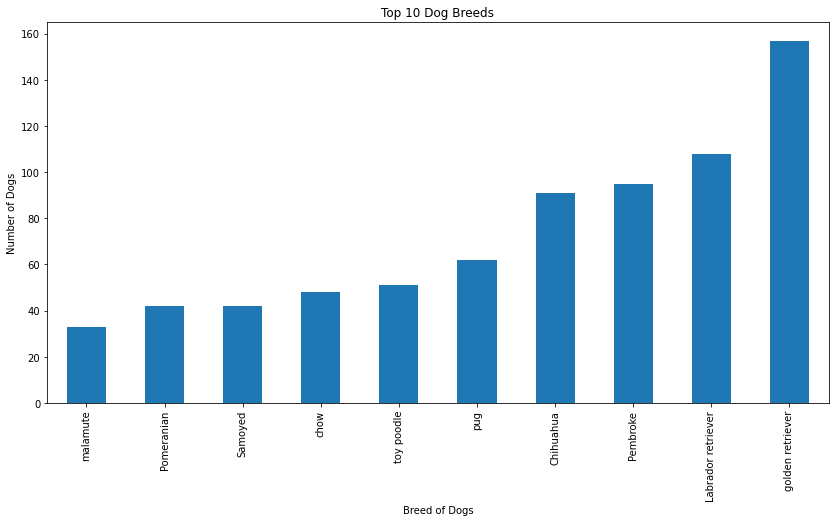

In [88]:
top_breeds = df_clean['breeds'].value_counts()[:10].sort_values(ascending=True)
top_breeds.plot(kind='bar')
plt.ylabel('Number of Dogs')
plt.xlabel('Breed of Dogs')
plt.title('Top 10 Dog Breeds');

## Top 10 Dog Names

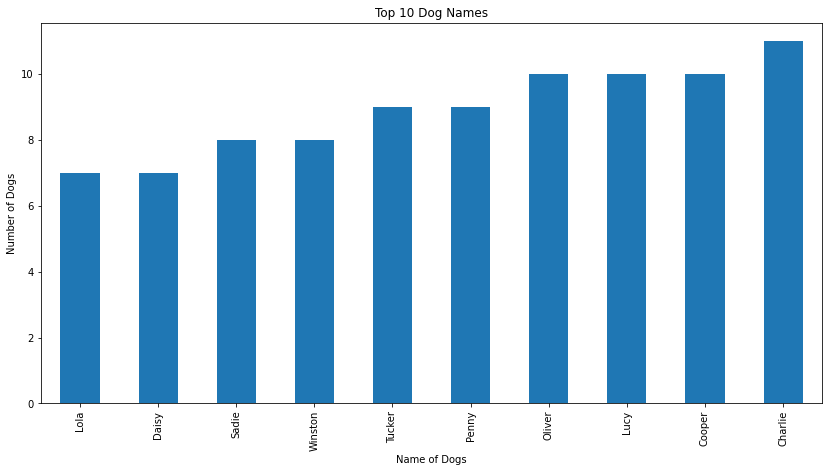

In [89]:
top_breeds = df_clean['name'].value_counts()[:10].sort_values(ascending=True)
top_breeds.plot(kind='bar', )
plt.ylabel('Number of Dogs')
plt.xlabel('Name of Dogs')
plt.title('Top 10 Dog Names');

## The distribution of dog ratings

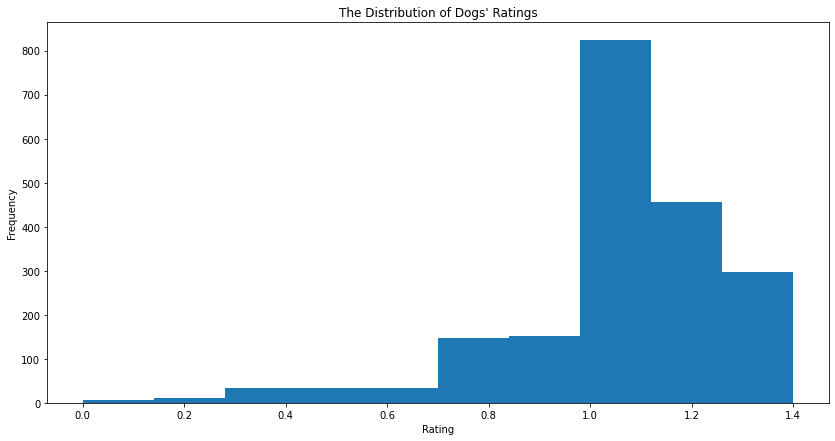

In [94]:
df_clean.rating.plot(kind='hist')
plt.title('The Distribution of Dogs\' Ratings')
plt.xlabel('Rating');

## What is most used source of a tweet?

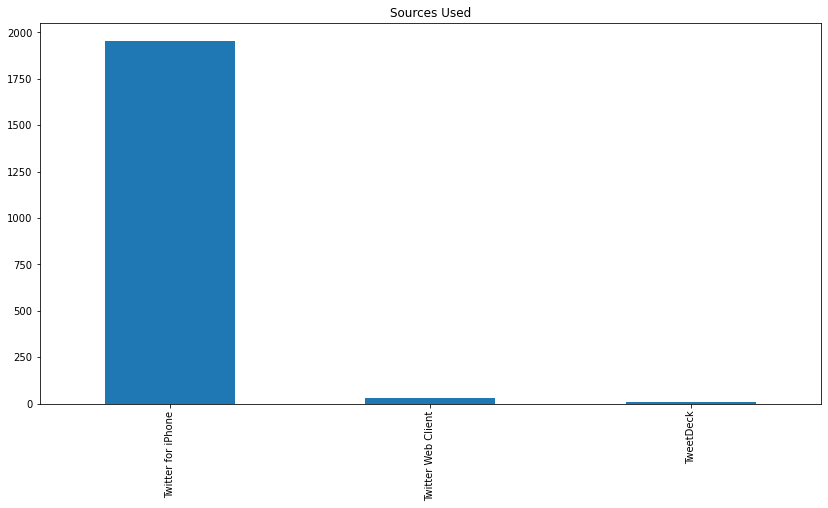

In [98]:
df_clean.source.value_counts().plot(kind='bar')
plt.title('Sources Used');

## The number of monthly tweets

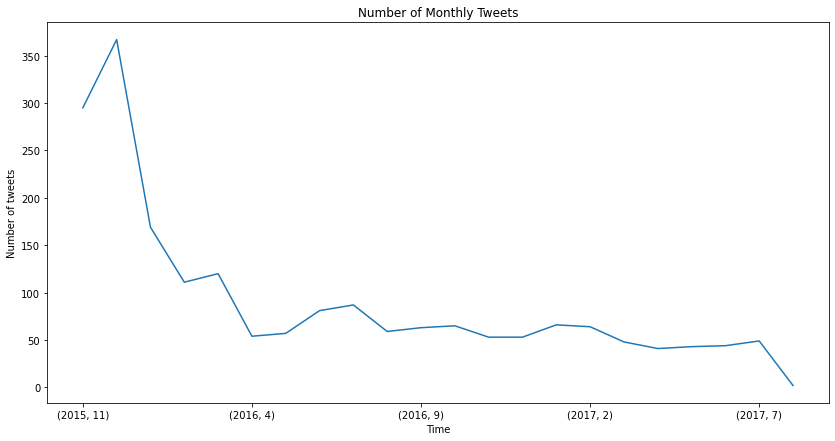

In [102]:
dates = df_clean['tweet_id'].groupby([df_clean['timestamp'].dt.year, df_clean['timestamp'].dt.month]).count()
dates.plot(kind='line')
plt.title('Number of Monthly Tweets')
plt.xlabel('Time')
plt.ylabel('Number of tweets');